#### co my w sumie chcemy pokazywać użytkownikowi?
ja proponuję:
- wydane do tej pory pieniądze
- obecna wartość posiadanych akcji
- aktualna wartość portfela
- wykres (słupkowy lub inny) pokazujący jaka jest obecna wartość posiadanych akcji każdej z firm
- wykres kołowy pokazujący jaka jest obecna wartość posiadanych akcji dla każdego sektora

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# przykładowa tabela z firmami, sektorami i obecnymi kursami
companies = pd.DataFrame(data={'firma': ['Adobe','Makita','21 st Century Fox','Starbucks','Facebook','BlackBerry','EBay','Netflix','Moderna','AstraZeneca','Apple','NASDAQ','Garmin'],
                           'sektor': ['informatyczny', 'elektryczny', 'rozrywkowy', 'gastronomiczny', 'informatyczny', 'elektroniczny', 'informatyczny', 'rozrywkowy', 'medyczny', 'medyczny', 'elektroniczny', 'ekonomiczny', 'elektroniczny'],
                           'kurs': [30.4,3.12,125.7,44.32,361.5,5.87,268.32,6.99,21.53,21.54,362.48,146.89,1.27],
                           'oplata': [1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75]})
companies

,firma,sektor,kurs,oplata
0,Adobe,informatyczny,30.40,1.75
1,Makita,elektryczny,3.12,1.75
2,21 st Century Fox,rozrywkowy,125.70,1.75
3,Starbucks,gastronomiczny,44.32,1.75
4,Facebook,informatyczny,361.50,1.75
5,BlackBerry,elektroniczny,5.87,1.75
6,EBay,informatyczny,268.32,1.75
7,Netflix,rozrywkowy,6.99,1.75
8,Moderna,medyczny,21.53,1.75
9,AstraZeneca,medyczny,21.54,1.75


# FUNKCJE
#### gotowe do przeklejenia do kodu

In [3]:
# funkcja przyjmująca ścieżkę do pliku csv, zwracająca tabelę z tego pliku

def load_csv(path):
    df = pd.read_csv(path, sep=';')
    df.dropna(axis=1, inplace=True)
    df['kurs'] = df['kurs'].str.replace('$', '')
    df['kurs'] = [x.replace(',', '.') for x in df['kurs']]
    df['kurs'] = df['kurs'].astype(float)
    df['oplata'] = df['oplata'].str.replace('$', '')
    df['oplata'] = [x.replace(',', '.') for x in df['oplata']]
    df['oplata'] = df['oplata'].astype(float)
    return df

# przykład użycia - jak uzyskać piękną tabelkę do wyświetlenia z csv
path = 'przykładowe_dane.csv'
test_df = load_csv(path)
test_df

,nazwa,kup/sprz,data,godzina,liczba akcji,kurs,oplata
0,Adobe,K,01.01.1999,15:31:43,20,26.51,1.75
1,Makita,K,02.02.1999,15:35:37,120,2.89,1.75
2,21 st Century Fox,K,02.02.1999,15:35:59,5,125.30,1.75
3,Starbucks,K,04.04.1999,15:47:20,30,42.20,1.75
4,Makita,S,05.06.1999,19:34:17,100,13.46,1.75
5,Facebook,K,06.07.1999,21:13:42,2,350.00,1.75
6,Adobe,K,06.07.1999,21:56:36,10,21.13,1.75
7,BlackBerry,K,06.11.1999,21:59:12,10,5.20,1.75
8,BlackBerry,S,06.11.1999,21:59:48,10,5.38,1.75
9,Makita,S,31.12.1999,20:28:28,20,3.02,1.75


In [45]:
# funkcja przyjmująca tabelę z transakcjami (czyli tą główną) oraz tabelę z sektorami i obecnymi kursami,
# licząca ile warte jest obecnie portfolio

def count_portfolio_value(transations_df, companies_df):
    shares_held = count_shares_held(transations_df)
    current_portfolio = portfolio_summary(shares_held, companies_df)
    money_spent = count_money_spent(transations_df)
    profit = count_all_profit(current_portfolio)
    return profit-money_spent

# przykład użycia
portfolio_value = count_portfolio_value(test_df, companies)
round(portfolio_value, 2)

2047.54

In [46]:
# funkcja przyjmująca tabelę z liczbą aktualnie posiadanych akcji oraz tabelę z sektorami i obecnymi kursami,
# zwracająca połączoną tabelę podsumowującą portfolio

def portfolio_summary(shares_held, companies):
    current_portfolio = shares_held.to_frame().join(companies.set_index('firma'))
    current_portfolio['wartosc'] = current_portfolio['balans'] * current_portfolio['kurs']
    return current_portfolio

# przykład użycia
current_portfolio = portfolio_summary(shares_held, companies)
current_portfolio

,balans,sektor,kurs,oplata,wartosc
nazwa,,,,,
Garmin,200.0,elektroniczny,1.27,1.75,254.00
Netflix,170.0,rozrywkowy,6.99,1.75,1188.30
Moderna,20.0,medyczny,21.53,1.75,430.60
AstraZeneca,10.0,medyczny,21.54,1.75,215.40
NASDAQ,8.0,ekonomiczny,146.89,1.75,1175.12
Apple,3.0,elektroniczny,362.48,1.75,1087.44


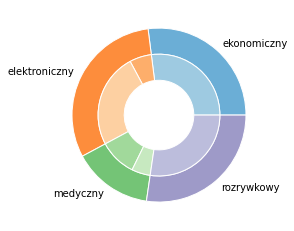

In [38]:
# funkcja przyjmująca tabelę podsumowującą portfolio, zwracająca wykres pokazujący udział sektorów (z podziałem na firmy)

def sectors_pie(current_portfolio):
    current_portfolio.sort_values(by='sektor', inplace=True)
    nested_data_out = current_portfolio.groupby(by=['sektor']).sum()['wartosc']
    labels_out = nested_data_out.index.values
    nested_data_in = current_portfolio['wartosc']
    
    fig, ax = plt.subplots()
    size = 0.3
    cmap = plt.get_cmap("tab20c")
    outer_colors = cmap([1, 5, 9, 13])
    inner_colors = cmap([2,6,7,10,11,14])

    ax.pie(nested_data_out, radius=1, colors=outer_colors, startangle=0, normalize=True,
           labels=labels_out, wedgeprops=dict(width=size, edgecolor='w'))
    ax.pie(nested_data_in, radius=1-size, colors=inner_colors, startangle=0, normalize=True,
           wedgeprops=dict(width=size, edgecolor='w'))
    return ax.pie
    
pie = sectors_pie(current_portfolio)

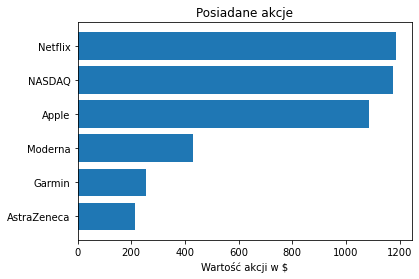

In [47]:
# funkcja przyjmująca tabelę podsumowującą portfolio, zwracająca wykres słupkowy,
# pokazujący wartość posiadanych akcji dla poszczególnych firm

def make_shares_held_barplot(current_portfolio):
    current_portfolio.sort_values(by='wartosc', ascending=True, inplace=True)
    plt.xlabel('Wartość akcji w $')
    plt.title('Posiadane akcje')
    return plt.barh(current_portfolio.index.values, current_portfolio['wartosc'])

shares_held_barplot = make_shares_held_barplot(current_portfolio)

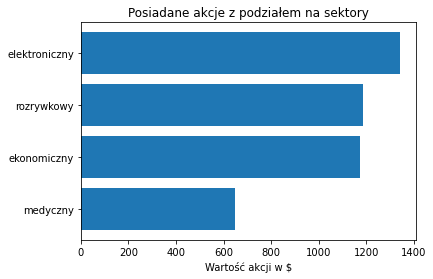

In [48]:
# TO SAMO CO WYŻEJ ALE Z PODZIAŁEM NA SEKTORY
# funkcja przyjmująca tabelę podsumowującą portfolio, zwracająca wykres słupkowy,
# pokazujący wartość posiadanych akcji dla poszczególnych sektorów

def make_sectors_barplot(current_portfolio):
    sectors = current_portfolio.groupby(by='sektor').sum().sort_values(by='wartosc', ascending=True)
    plt.xlabel('Wartość akcji w $')
    plt.title('Posiadane akcje z podziałem na sektory')
    return plt.barh(sectors.index.values, sectors['wartosc'])

sectors_barplot = make_sectors_barplot(current_portfolio)

# POZOSTAŁE FUNKCJE
#### klocki potrzebne żeby powyższe funkcje działały

In [5]:
# funkcja przyjmująca tabelę z transakcjami (czyli tą główną) i zwracająca tabelę z liczbą aktualnie posiadanych akcji

def count_shares_held(df):
    kupione_akcje = df[df['kup/sprz']=='K'].groupby(['nazwa']).sum()['liczba akcji']
    sprzedane_akcje = df[df['kup/sprz']=='S'].groupby(['nazwa']).sum()['liczba akcji']
    portfel = pd.DataFrame(kupione_akcje)
    portfel.rename(columns={"liczba akcji": "kupione"}, inplace=True)
    portfel['sprzedane'] = sprzedane_akcje
    portfel.fillna(0, inplace=True)
    portfel['balans'] = portfel['kupione'] - portfel['sprzedane']
    return portfel['balans'][portfel['balans'] > 0].sort_values(ascending=False)

# przykład użycia
shares_held = count_shares_held(test_df)
shares_held

nazwa
Garmin         200.0
Netflix        170.0
Moderna         20.0
AstraZeneca     10.0
NASDAQ           8.0
Apple            3.0
Name: balans, dtype: float64

In [6]:
# funkcja pomocnicza
def transaction_val(row):
    if row['kup/sprz'] == 'K':
        return row['liczba akcji']*row['kurs']+row['oplata']
    elif row['kup/sprz'] == 'S':
        return -1*(row['liczba akcji']*row['kurs'])+row['oplata']

In [43]:
# funkcja przyjmująca  tabelę z transakcjami (czyli tą główną) i zwracająca liczbę - ile do tej pory wydano pieniędzy na giełdzie

def count_money_spent(df):
    all_trans_val = df.apply(transaction_val, axis=1).sum()
    return all_trans_val

# przykład użycia
money_spent = count_money_spent(test_df)
round(money_spent, 2)

2292.82

In [40]:
# funkcja pomocnicza
def count_profit(row):
    return row['wartosc']-row['oplata']

In [42]:
# funkcja przyjmująca tabelę podsumowującą portfolio, zwracająca jaka jest wartość akcji przy obecnych kursach
# (czyli ile by się zarobiło gdyby teraz je wszystkie sprzedać)

def count_all_profit(current_portfolio):
    possible_profit = current_portfolio.apply(count_profit, axis=1).sum()
    return possible_profit

# przykład użycia
profit = count_all_profit(current_portfolio)
round(profit, 2)

4340.36